<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Author: [Yury Kashnitskiy](https://yorko.github.io) (@yorko). Translated and edited by [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Eugene Mashkin](https://www.linkedin.com/in/eugene-mashkin-88490883/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center>Assignment #7. Solution </center> <a class="tocSkip">
    
## <center> Principal Component Analysis and Clustering </center><a class="tocSkip">

In this assignment, we are going to walk through `sklearn` built-in implementations of dimensionality reduction and clustering methods and apply these techniques to the popular "faces" dataset.


**Your task is to:**
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://forms.gle/W1dtNVMSVpSQBt7s5).


## 1. Principal Component Analysis

First import all required modules:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="white")
# sharper plots
%config InlineBackend.figure_format = 'retina'

Use given toy data set:

In [2]:
X = np.array(
    [
        [2.0, 13.0],
        [1.0, 3.0],
        [6.0, 19.0],
        [7.0, 18.0],
        [5.0, 17.0],
        [4.0, 9.0],
        [5.0, 22.0],
        [6.0, 11.0],
        [8.0, 25.0],
    ]
)

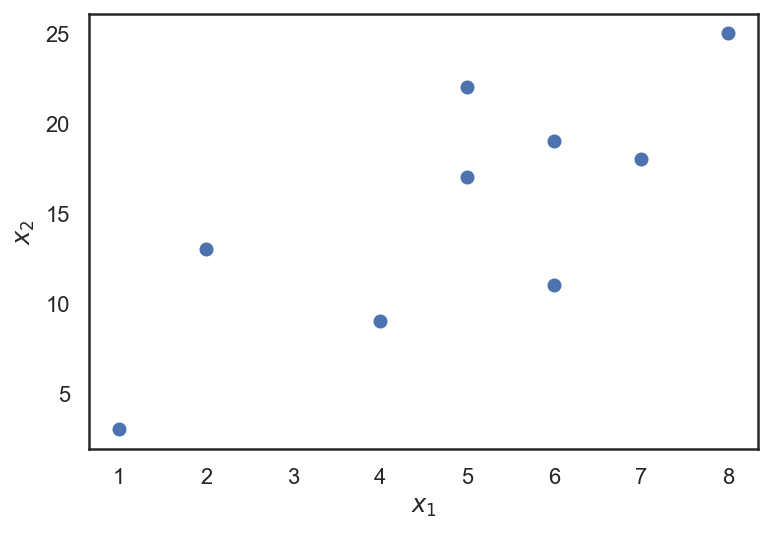

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$");

**<font color='red'>Question 1.</font> What is the angle between the $x_1$ axis and the vector corresponding to the first principal component for this data (don't forget to rescale the data using StandardScaler)?**
- 30 degrees
- 45 degrees **<font color='red'>[+]</font>**
- 60 degrees
- 75 degrees

In [4]:
# Answer
from scipy.linalg import svd

X_scaled = StandardScaler().fit_transform(X)
U, Sigma, VT = svd(X_scaled)
print(VT)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


**<font color='red'>Question 2.</font> What are the eigenvalues of the $X^{\text{T}}X$ matrix, given $X$, a scaled matrix from the previous question?**

 - 4 and 1.42
 - 16.2 and 2702.8
 - 4.02 and 51.99
 - 15.97 and 2.03 **<font color='red'>[+]</font>**

In [5]:
# Answer
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([15.96987204,  2.03012796])

**<font color='red'>Question 3.</font> What is the meaning of the two numbers from the previous question?**


- their squares tell what part of the initial data's variance is explained by principal components
- they define a rotation angle between the first principal component and the initial axis
- those numbers tell what part of the initial data's variance is explained by principal components **<font color='red'>[+]</font>**
- the square roots of those numbers define a rotation angle between the first principal component and the initial axis

Let's load a dataset of peoples' faces and output their names (this step requires reliable and fast internet connection).

In [6]:
lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50, resize=0.4, data_home="../../_static/data/faces"
)

print(
    "%d objects, %d features, %d classes"
    % (lfw_people.data.shape[0], lfw_people.data.shape[1], len(lfw_people.target_names))
)
print("\nPersons:")
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Let's look inside. All images are stored in a handy `lfw_people.images` array.

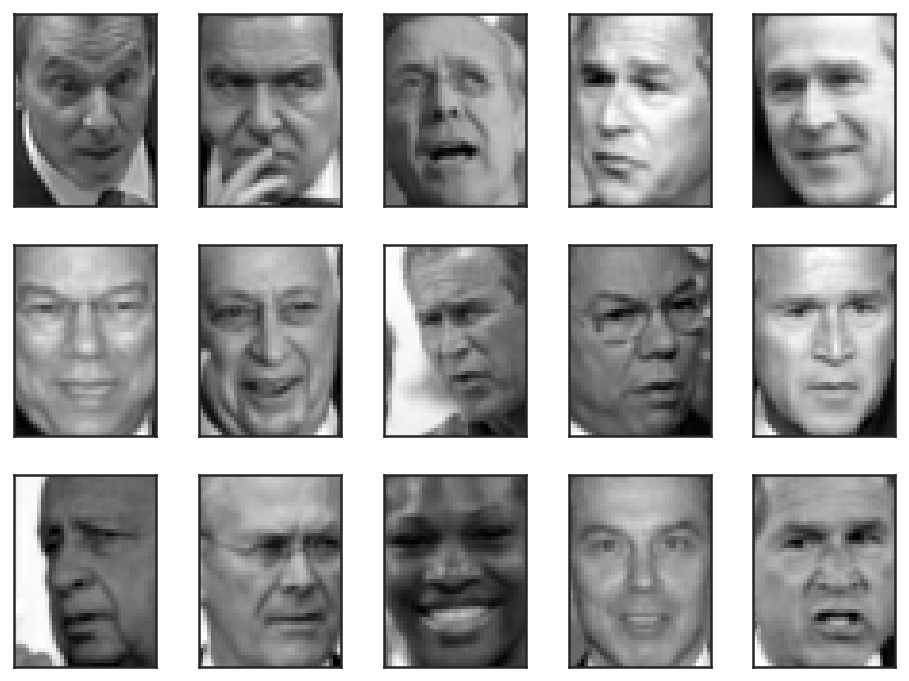

In [7]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap="gray")

**<font color='red'>Question 4.</font> What's the _minimal_ number of principal components is needed to explain 90% variance in the data (scaled using  StandardScaler)?**

- 75
- 76
- 77 **<font color='red'>[+]</font>**
- 78

For this task, you should be using the [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) parameter, which is a PCA approximation, but it significantly increases performance on large data sets. Use fixed `random_state=1` for comparable results.

1560 principal components explain 100.00% of variance


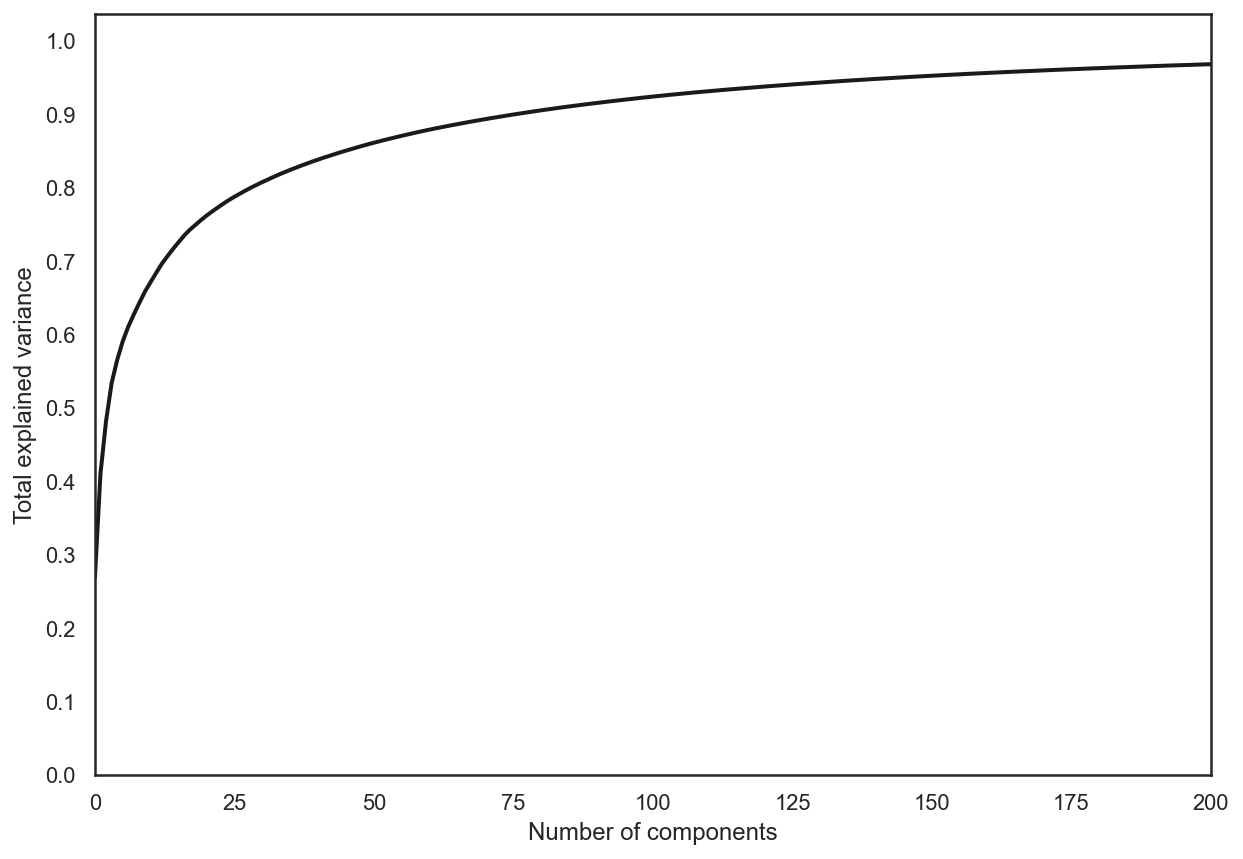

In [8]:
# Answer
pca = PCA(svd_solver="randomized", random_state=1)

scaler = StandardScaler()
faces_scaled = scaler.fit_transform(lfw_people.data)

pca.fit(faces_scaled)

print(
    "%d principal components explain %.2f%% of variance"
    % (pca.n_components_, 100 * np.cumsum(pca.explained_variance_ratio_)[-1])
)
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color="k")
plt.xlabel("Number of components")
plt.ylabel("Total explained variance")
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [9]:
# Note that np.where returns elements' indices so the number of principal components is 76+1 = 77
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)

(array([  76,   77,   78, ..., 1557, 1558, 1559]),)

Print a picture showing the first 30 principal components (don't be scared when you see the result). In order to create it, use 30 vectors from `pca.components_`, reshape them to their initial size (50 x 37) and display. Specify `cmap`='binary'.

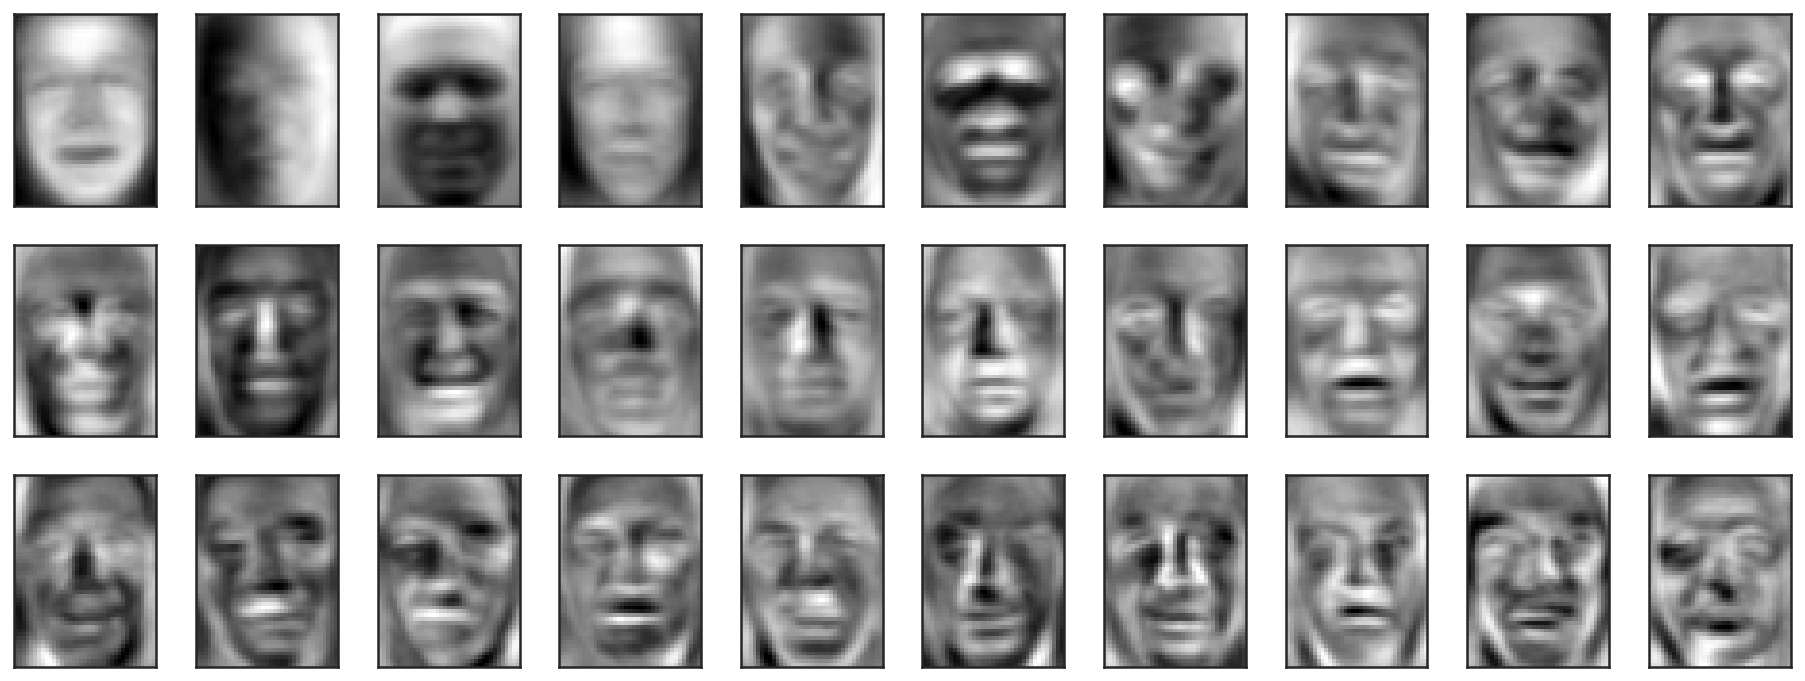

In [10]:
# Answer
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap="binary")

**<font color='red'>Question 5.</font> Within the first 30 principal components, which one brightens the left side of the face? More specifically, which principal component corresponds to a linear combination of the initial features (pixels' intensity), which, when shown as an image, looks like a photo highlighted from the right side (the same as a face highlighted from its left side)?**

- 1
- 2 **<font color='red'>[+]</font>**
- 4
- 5

Now let's create a projection of faces into the space of the first two principal components. 

**<font color='red'>Question 6.</font> Who looks the least similar to other person in the dataset if only two first principal components are taken into consideration?**

To answer the question, take two first principal components from scaled data, evaluate two mean principal components' values for each person over all their images in dataset (again, use both svd_solver='randomized' and random_state=1). Then, having 12 two-dimensional points, find the one which has the largest distance from others (using Euclidean distances). You can do this either precisely or approximately using `sklearn.metrics.euclidean_distances` and `seaborn.heatmap`.

- Colin Powell
- George W Bush
- Jacques Chirac
- Serena Williams **<font color='red'>[+]</font>**

In [11]:
# Answer
lfw_people.target_names, len(lfw_people.target_names)

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
        'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
        'Serena Williams', 'Tony Blair'], dtype='<U17'),
 12)

In [12]:
pca = PCA(n_components=2, svd_solver="randomized", random_state=1)
pca.fit(faces_scaled)

mean_face_centers = []

for i, name in enumerate(lfw_people.target_names):
    cloud = pca.transform(faces_scaled[lfw_people.target == i])
    mean_face_centers.append(cloud.mean(axis=0))

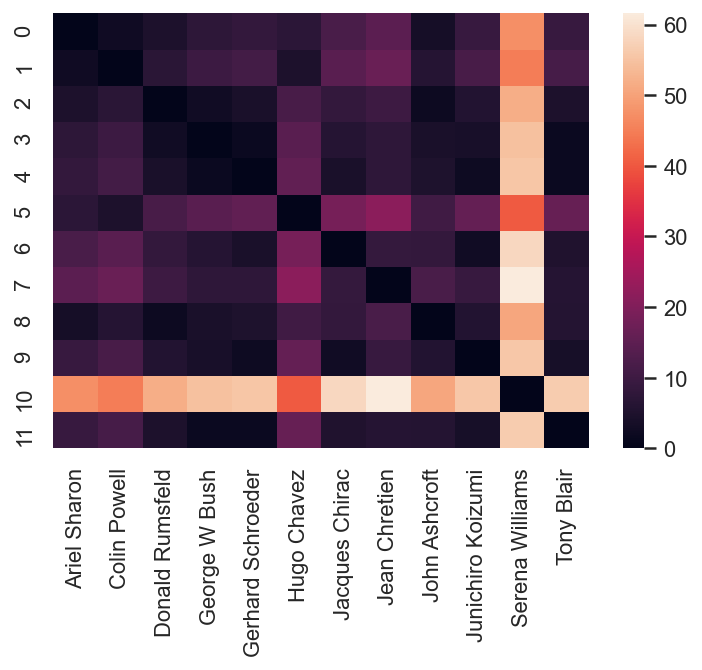

In [13]:
from sklearn.metrics import euclidean_distances

sns.heatmap(euclidean_distances(mean_face_centers))
plt.xticks(np.arange(12) + 0.5, lfw_people.target_names, rotation="vertical");

The answer is Serena Williams.

## 2. Clustering

For the next question load the housing prices dataset:

In [14]:
boston = datasets.load_boston()
X = boston.data

Using elbow-method (see [article 7](https://medium.com/@libfun/db7879568417) of the course) find the optimal number of clusters to set as a hyperparamenter for kMeans algorithm.

**<font color='red'>Question 7.</font> What is the optimal number of clusters for housing prices data set according to the elbow method? Use `random_state=1` in kMeans method, do not scale the data.**

- 2 **<font color='red'>[+]</font>**
- 3
- 4
- 5

In this case we are looking for the most significant curve fracture on the `Clusters number vs Centroid distances` graph. Consider the possible number of clusters from 2 to 10. Use `random_state=1` for the kMeans algorithm initialization.

k=2: D(k)=0.325
k=3: D(k)=0.625
k=4: D(k)=0.328
k=5: D(k)=1.018
k=6: D(k)=0.632
k=7: D(k)=0.681
k=8: D(k)=0.907


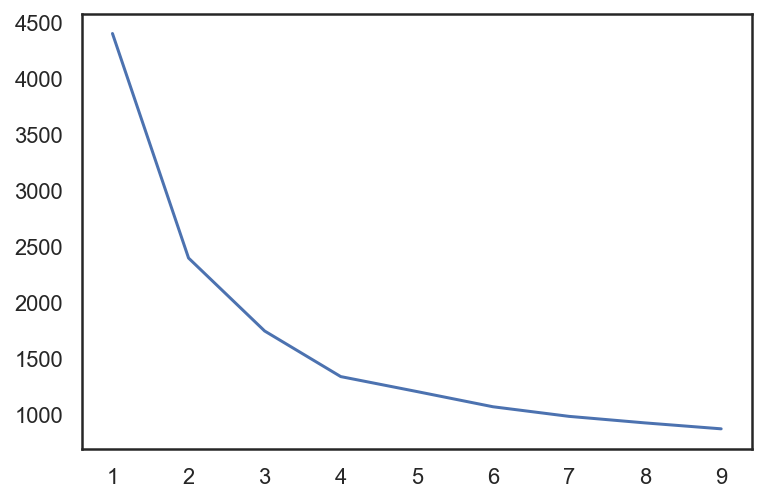

In [15]:
# Answer
func = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    func.append(np.sqrt(kmeans.inertia_))


scores = []
for i in range(1, 8):
    scores.append((func[i] - func[i + 1]) / (func[i - 1] - func[i]))
    print("k={}: D(k)={}".format(i + 1, round(scores[i - 1], 3)))
plt.plot(range(1, 10), func);

Go back to the faces dataset (that is already scaled). Imagine that we did not know the names for who was each photo but that we knew that there were 12 different people. Let's compare clustering results from 4 algorithms - k-means, Agglomerative clustering, Affinity Propagation, and Spectral clustering. Use the same respective parameters as in the end of [this article](https://medium.com/@libfun/db7879568417), only change the number of clusters to 12.

**<font color='red'>Question 8.</font> Select all of the correct statements:**

- Agglomerative clustering worked better than others according to all metrics
- Clustering results are disappointing with no metric exceeding 0.35 **<font color='red'>[+]</font>**
- Considering only 2 clusters (whether it is Serena Williams or not) and comparing clustering results with a binary vector, we can see that clustering algorithms work better, with some metrics exceeding 66% **<font color='red'>[+]</font>**

In [16]:
# Answer
from sklearn.cluster import (AffinityPropagation, AgglomerativeClustering,
                             KMeans, SpectralClustering)

algorithms = [
    KMeans(n_clusters=12, random_state=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=12, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=12),
]

res = []
for algo in algorithms:
    algo.fit(faces_scaled)
    res.append(
            {
                "ARI": metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(
                    lfw_people.target, algo.labels_
                ),
                "Homogenity": metrics.homogeneity_score(
                    lfw_people.target, algo.labels_
                ),
                "Completeness": metrics.completeness_score(
                    lfw_people.target, algo.labels_
                ),
                "V-measure": metrics.v_measure_score(lfw_people.target, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results = pd.DataFrame(
    data=res,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)

/Users/kashnitskiyy/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


In [17]:
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.027093,0.072943,0.095802,0.083819,0.089410,0.044945
Affinity,0.014616,0.118340,0.305615,0.154552,0.205288,0.019190
Spectral,0.026194,0.079021,0.099480,0.093259,0.096269,0.039685
Agglomerative,0.027382,0.077457,0.099838,0.089044,0.094132,0.025744


In [18]:
# And check the last statement
algorithms2 = [
    KMeans(n_clusters=2, random_state=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=2, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=2),
]

is_serena = (lfw_people.target == 10).astype("int")

res2 = []
for algo in algorithms2:
    algo.fit(faces_scaled)
    res2.append(
            {
                "ARI": metrics.adjusted_rand_score(is_serena, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(is_serena, algo.labels_),
                "Homogenity": metrics.homogeneity_score(is_serena, algo.labels_),
                "Completeness": metrics.completeness_score(is_serena, algo.labels_),
                "V-measure": metrics.v_measure_score(is_serena, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results2 = pd.DataFrame(
    data=res2,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)
results2

/Users/kashnitskiyy/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:154: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.027811,0.070053,0.200508,0.042976,0.070781,0.145569
Affinity,0.001555,0.033613,0.675966,0.023447,0.045322,0.019190
Spectral,0.104632,0.108844,0.276347,0.068378,0.109630,0.161030
Agglomerative,0.026231,0.061530,0.176463,0.037801,0.062264,0.119324


Use the coordinates of 12 "average" people's images you got before. Draw a dendrogram for them. Use the `scipy.cluster.hierarchy` and `scipy.spatial.distance.pdist`, take parameters values from the appropriate example in the [article](https://medium.com/@libfun/db7879568417).

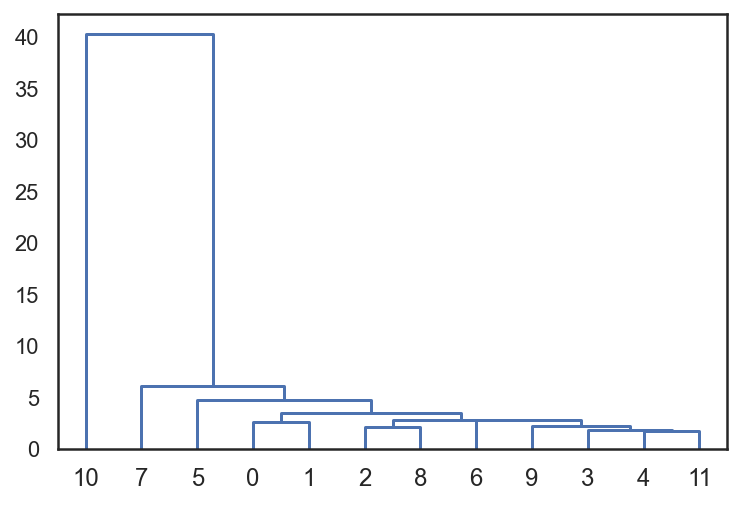

In [19]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

""" Your code is here """
distance_mat = pdist(mean_face_centers)

Z = hierarchy.linkage(distance_mat, "single")
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

**<font color='red'>Question 9.</font>  Look at the dendrogram and consider a step when just two clusters are left: Serena Williams vs. all.  Who was the last person added to the "big" cluster?**  

- Gerhard Schroeder
- Jean Chretien **<font color='red'>[+]</font>**
- John Ashcroft
- Junichiro Koizumi

In [20]:
# Answer
lfw_people.target_names[7]

'Jean Chretien'